In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn .ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# read data
df =  pd.read_excel("diabetes.xlsx")
df.head()

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio,Diabetes
0,69220,Gwendolyn,Runolfsson,1,21,7,2.0,6.0,1.0,2,...,5.0,88.0,7.27,47.0,49.0,50.3,3650.0,2846.0,0.779726,0.0
1,63030,Augustus,Farrell,0,21,1,2.0,6.0,3.0,4,...,5.2,88.0,12.01,40.0,112.0,90.1,4327.0,3629.0,0.838687,0.0
2,64051,Aaron,Schmeler,0,21,2,3.0,5.0,4.0,3,...,5.1,NaN,NaN,38.0,NaN,72.7,4471.0,3725.0,0.833147,0.0
3,65141,Bob,Bechtelar,0,21,1,2.0,5.0,4.0,4,...,5.1,95.0,3.60,55.0,73.0,86.6,5161.0,4301.0,0.833366,0.0
4,64632,Hayden,Brekke,0,21,2,3.0,5.0,10.0,2,...,6.0,95.0,14.58,39.0,55.0,94.4,6250.0,5168.0,0.826880,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seqn            5206 non-null   int64  
 1   first           5206 non-null   object 
 2   last            5206 non-null   object 
 3   gender          5206 non-null   int64  
 4   age             5206 non-null   int64  
 5   race            5206 non-null   int64  
 6   education       5202 non-null   float64
 7   marital         5202 non-null   float64
 8   income          4689 non-null   float64
 9   household_size  5206 non-null   int64  
 10  insurance       5206 non-null   int64  
 11  private_insur   2574 non-null   float64
 12  medicare        1117 non-null   float64
 13  medicaid        578 non-null    float64
 14  military_insur  129 non-null    float64
 15  no_insurance    2 non-null      float64
 16  gen_health      4603 non-null   float64
 17  fam_savings     2156 non-null   f

In [4]:
df.columns

Index(['seqn', 'first', 'last', 'gender', 'age', 'race', 'education',
       'marital', 'income', 'household_size', 'insurance', 'private_insur',
       'medicare', 'medicaid', 'military_insur', 'no_insurance', 'gen_health',
       'fam_savings', 'asthma', 'memory', 'chf', 'cad', 'mi', 'cva', 'copd',
       'cancer', 'diabetes', 'depression', 'hypertension', 'smoker',
       'days_active', 'drinks_day', 'weight_kg', 'height_cm', 'bmi',
       'waist_cm', 'pulse', 'sys_bp', 'dia_bp', 'drugs', 'alb_cr_ratio', 'alb',
       'alt', 'ast', 'alk_phos', 'bun', 'ca', 'cpk', 't_chol', 'bicarb', 'cr',
       'glucose', 'iron', 'ldh', 'phos', 't_bilirubin', 't_protein', 'u_acid',
       'sodium', 'potassium', 'chloride', 'glob', 'trigs', 'wbc', 'hgb', 'hct',
       'platelets', 's_cotinine', 'a1c', 'glucose.1', 'insulin', 'hdl',
       'ldl_chol', 'grip_strength', 'fvc', 'fev1', 'fev1_fvc_ratio',
       'Diabetes '],
      dtype='object')

In [5]:
df.describe()

,seqn,gender,age,race,education,marital,income,household_size,insurance,private_insur,...,a1c,glucose.1,insulin,hdl,ldl_chol,grip_strength,fvc,fev1,fev1_fvc_ratio,Diabetes
count,5206.000000,5206.000000,5206.000000,5206.000000,5202.000000,5202.000000,4689.000000,5206.000000,5206.000000,2574.000000,...,4916.000000,2423.000000,2317.000000,4812.000000,2346.000000,4588.000000,4241.000000,4241.000000,4241.000000,4916.000000
mean,67074.788705,0.508068,49.382828,3.501921,3.470204,2.605536,8.114950,3.136957,1.246254,1.029526,...,5.807201,108.839868,14.006616,52.465919,114.447570,70.637794,3804.694883,2991.637114,0.786711,0.151749
std,2832.377535,0.499983,17.434263,1.493468,1.278990,1.858510,4.519748,1.642223,0.490114,1.497991,...,1.143576,35.528567,17.967539,14.830473,35.261352,22.750423,1089.972909,901.853711,0.083763,0.358814
min,62161.000000,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.600000,39.000000,0.140000,14.000000,9.000000,15.900000,664.000000,409.000000,0.313041,0.000000
25%,64611.500000,0.000000,34.000000,3.000000,3.000000,1.000000,5.000000,2.000000,1.000000,1.000000,...,5.300000,92.000000,6.600000,42.000000,89.250000,53.500000,2986.000000,2333.000000,0.743536,0.000000
50%,67106.500000,1.000000,49.000000,3.000000,4.000000,2.000000,7.000000,3.000000,1.000000,1.000000,...,5.500000,100.000000,10.350000,50.000000,112.000000,66.750000,3714.000000,2925.000000,0.796350,0.000000
75%,69533.500000,1.000000,63.000000,4.000000,5.000000,5.000000,14.000000,4.000000,1.000000,1.000000,...,5.900000,110.000000,16.880000,61.000000,136.000000,86.800000,4543.000000,3583.000000,0.841052,0.000000
max,71915.000000,1.000000,80.000000,7.000000,5.000000,6.000000,15.000000,7.000000,9.000000,77.000000,...,17.800000,382.000000,647.500000,175.000000,331.000000,169.600000,7863.000000,6923.000000,0.999668,1.000000


In [6]:
# df.dropna(inplace=True)

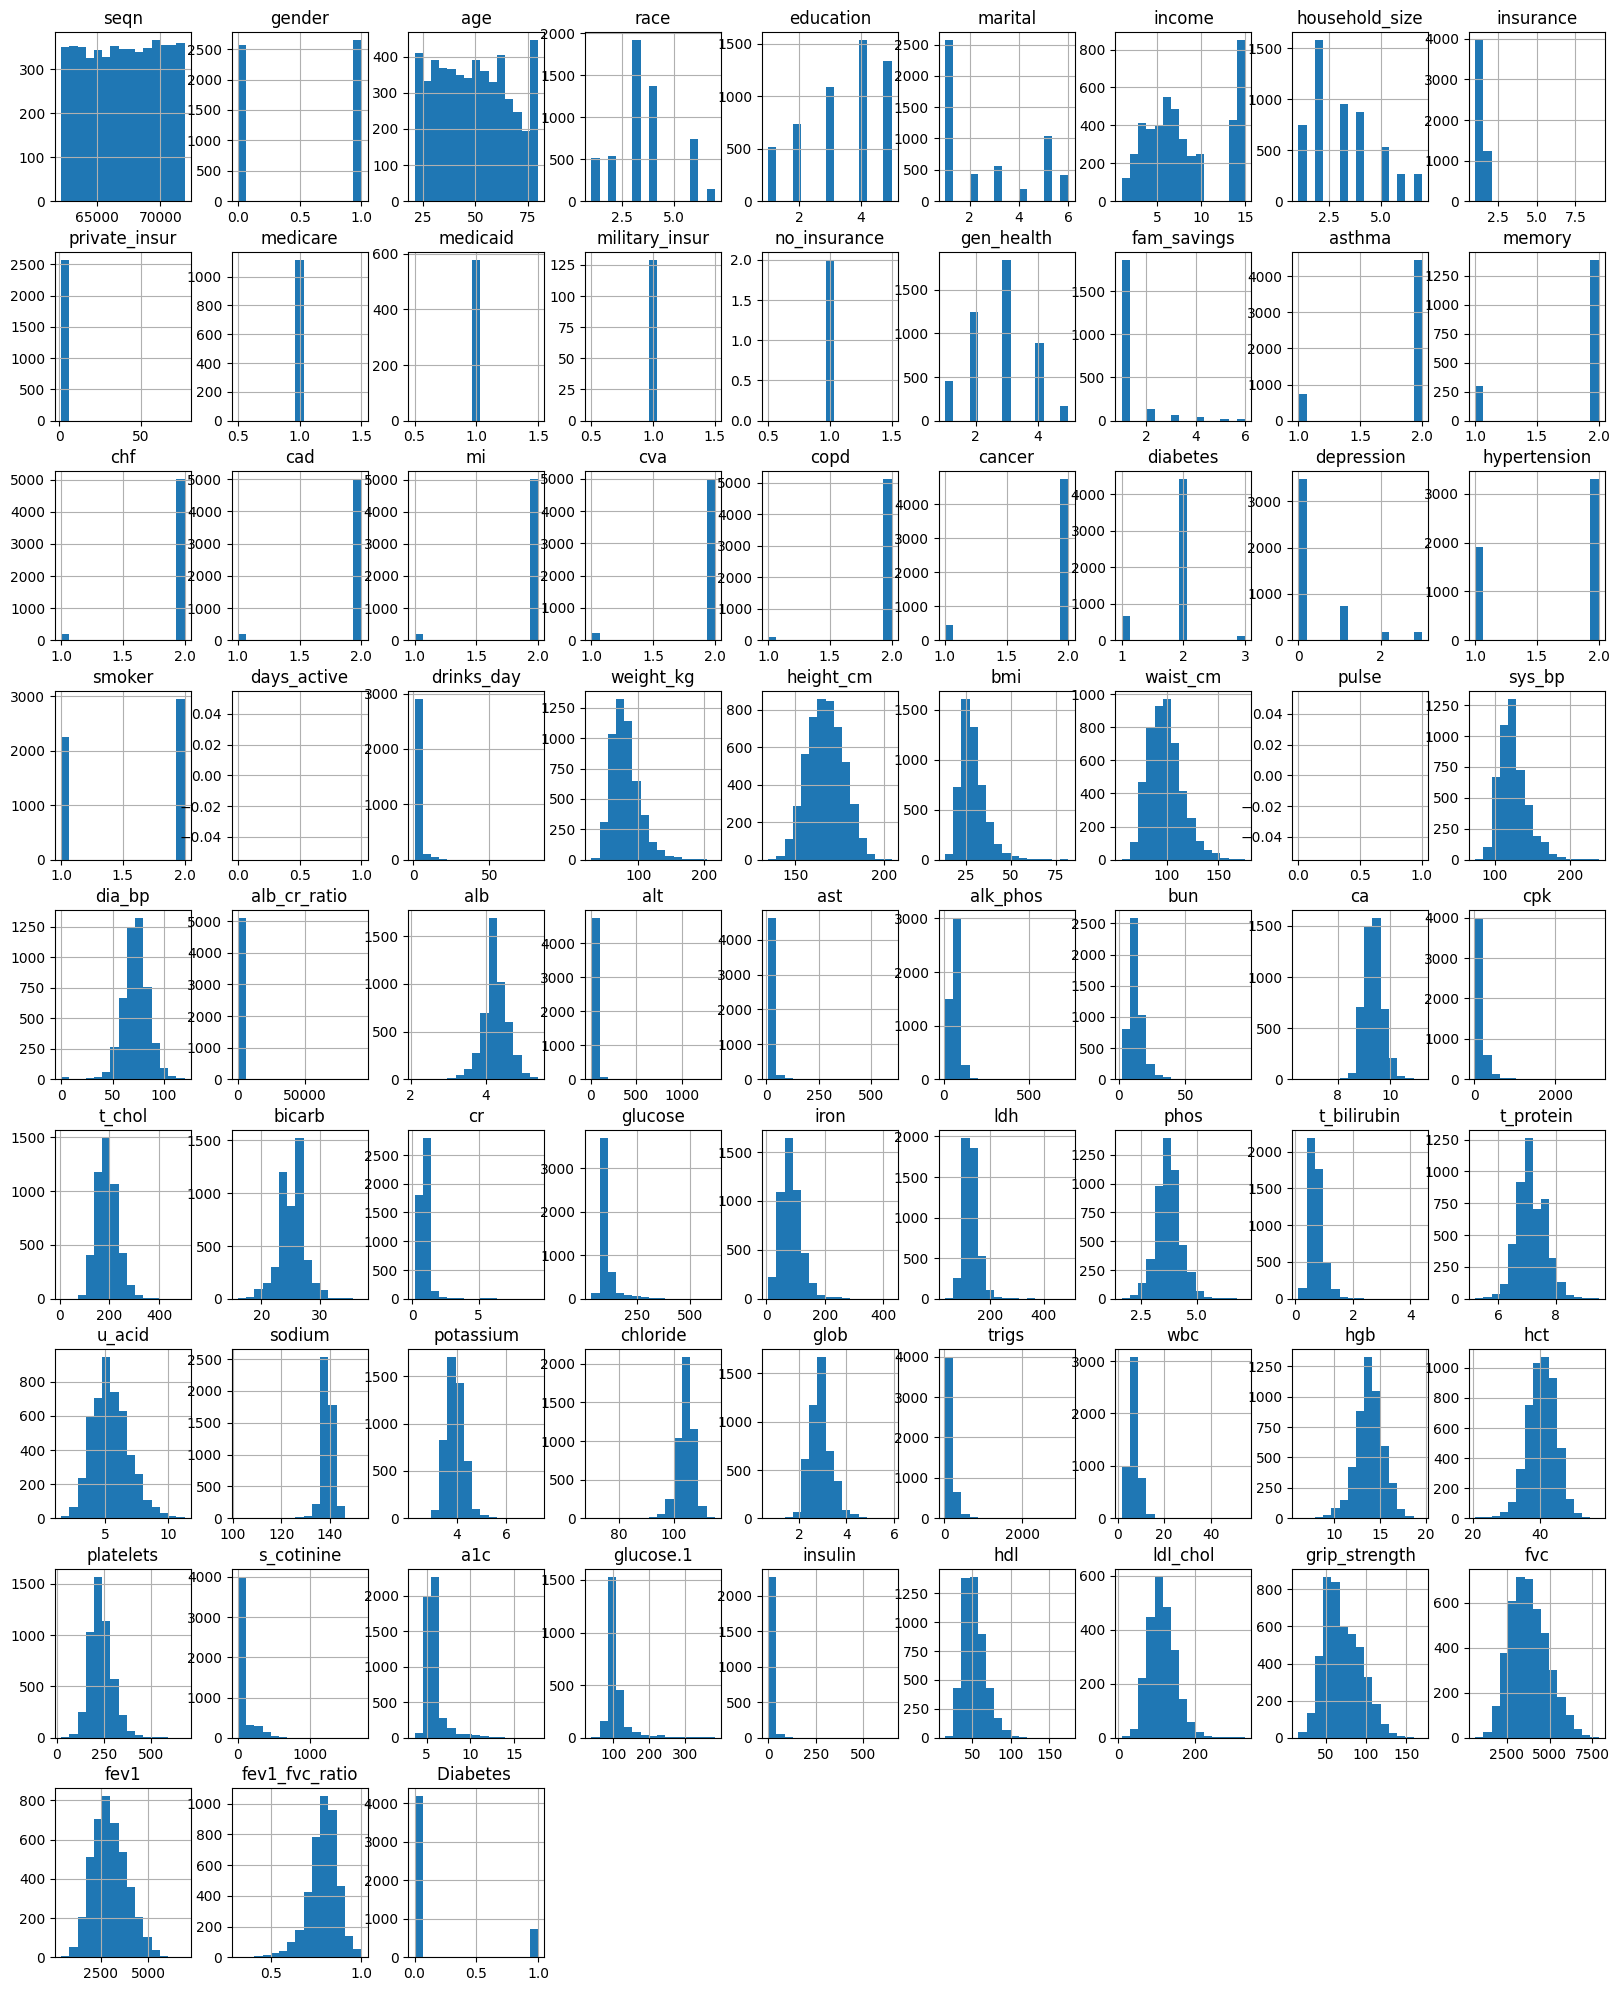

In [7]:
#Visualisation of all variables before imputation
df.hist(figsize=(20,25), bins=15)
plt.show()

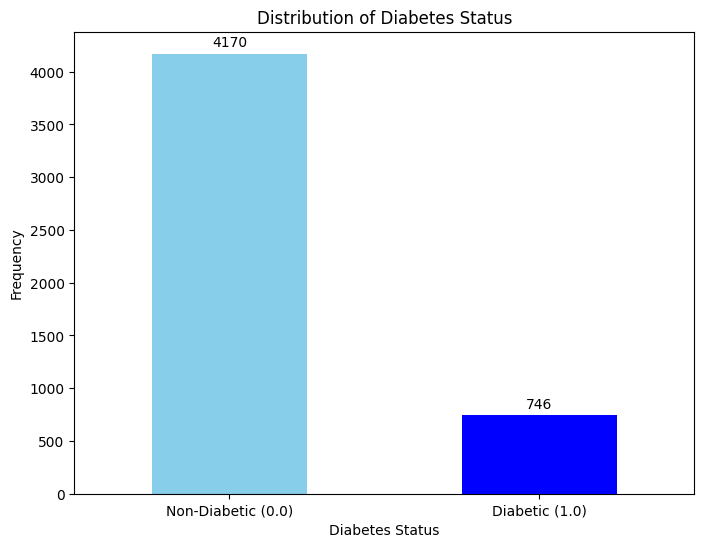

In [8]:
diabetes_counts = df['Diabetes '].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
ax = diabetes_counts.plot(kind='bar', color=['skyblue', 'blue'])
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(diabetes_counts.index)), labels=['Non-Diabetic (0.0)', 'Diabetic (1.0)'], rotation=0)

# Adding value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points')

plt.show()

In [9]:
# Step 1: Identify columns with numerical types and low unique values
df.select_dtypes(include=['number'])
categorical_like_columns = [col for col in df.columns if (df[col].dtype == 'float' or df[col].dtype == 'int') and df[col].nunique() < 10]

# Step 2: Add specific columns to the list
categorical_like_columns = categorical_like_columns + [ 'race', 'household_size', 'insurance','gender','income']

# Step 3: Convert identified columns to 'category' type
for col in categorical_like_columns:
    df[col] = df[col].astype('category')

# Display the DataFrame info to confirm changes
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   seqn            5206 non-null   int64   
 1   first           5206 non-null   object  
 2   last            5206 non-null   object  
 3   gender          5206 non-null   category
 4   age             5206 non-null   int64   
 5   race            5206 non-null   category
 6   education       5202 non-null   category
 7   marital         5202 non-null   category
 8   income          4689 non-null   category
 9   household_size  5206 non-null   category
 10  insurance       5206 non-null   category
 11  private_insur   2574 non-null   category
 12  medicare        1117 non-null   category
 13  medicaid        578 non-null    category
 14  military_insur  129 non-null    category
 15  no_insurance    2 non-null      category
 16  gen_health      4603 non-null   category
 17  fam_savings   

In [10]:
df['glucose'] = df['glucose'] * 0.0555

Missing values

In [11]:
null_percentages = df.isnull().sum()/len(df)*100
null_percentages[null_percentages > 60]

medicare           78.543988
medicaid           88.897426
military_insur     97.522090
no_insurance       99.961583
memory             67.614291
days_active       100.000000
pulse             100.000000
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   seqn            5206 non-null   int64   
 1   first           5206 non-null   object  
 2   last            5206 non-null   object  
 3   gender          5206 non-null   category
 4   age             5206 non-null   int64   
 5   race            5206 non-null   category
 6   education       5202 non-null   category
 7   marital         5202 non-null   category
 8   income          4689 non-null   category
 9   household_size  5206 non-null   category
 10  insurance       5206 non-null   category
 11  private_insur   2574 non-null   category
 12  medicare        1117 non-null   category
 13  medicaid        578 non-null    category
 14  military_insur  129 non-null    category
 15  no_insurance    2 non-null      category
 16  gen_health      4603 non-null   category
 17  fam_savings   

In [13]:
df= df.rename(columns={'Diabetes ': 'Diabetes'})

In [14]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Set a threshold for high correlation
high_corr_threshold = 0.9
low_corr_threshold = 0.1

# Find pairs of highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(column, idx) for column in upper.columns for idx in upper.index if abs(upper[column][idx]) > high_corr_threshold]



# Drop one feature from each pair of highly correlated features
features_to_drop = set([pair[1] for pair in high_corr_pairs] )

print(f"High correlation pairs: {high_corr_pairs}")
print(f"Features to drop: {features_to_drop}")

# Create a reduced dataframe with the selected features removed
df_reduced = df.drop(columns=features_to_drop)
print(f"Remaining columns: {df_reduced.columns.tolist()}")

High correlation pairs: [('waist_cm', 'bmi'), ('hct', 'hgb'), ('glucose.1', 'glucose'), ('ldl_chol', 't_chol'), ('fev1', 'fvc')]
Features to drop: {'bmi', 't_chol', 'glucose', 'fvc', 'hgb'}
Remaining columns: ['seqn', 'first', 'last', 'gender', 'age', 'race', 'education', 'marital', 'income', 'household_size', 'insurance', 'private_insur', 'medicare', 'medicaid', 'military_insur', 'no_insurance', 'gen_health', 'fam_savings', 'asthma', 'memory', 'chf', 'cad', 'mi', 'cva', 'copd', 'cancer', 'diabetes', 'depression', 'hypertension', 'smoker', 'days_active', 'drinks_day', 'weight_kg', 'height_cm', 'waist_cm', 'pulse', 'sys_bp', 'dia_bp', 'drugs', 'alb_cr_ratio', 'alb', 'alt', 'ast', 'alk_phos', 'bun', 'ca', 'cpk', 'bicarb', 'cr', 'iron', 'ldh', 'phos', 't_bilirubin', 't_protein', 'u_acid', 'sodium', 'potassium', 'chloride', 'glob', 'trigs', 'wbc', 'hct', 'platelets', 's_cotinine', 'a1c', 'glucose.1', 'insulin', 'hdl', 'ldl_chol', 'grip_strength', 'fev1', 'fev1_fvc_ratio', 'Diabetes']


In [15]:
df_dm = df.drop(columns = [ 'seqn','fvc', 'fev1', 'fev1_fvc_ratio','insurance', 'private_insur',
      'medicare', 'medicaid', 'military_insur','gen_health', 'no_insurance','asthma', 'pulse','first', 'diabetes','last','days_active',  'cancer', 'drugs', 'copd','glucose.1',])

In [16]:
# Step 1: Identify columns with numerical types and low unique values
df_dm.select_dtypes(include=['number'])
categorical_like_columns = [col for col in df_dm.columns if (df_dm[col].dtype == 'float' or df_dm[col].dtype == 'int') and df_dm[col].nunique() < 10]

# Step 2: Add specific columns to the list
categorical_like_columns = categorical_like_columns + ['race', 'household_size', 'gender','income']

# Step 3: Convert identified columns to 'category' type
for col in categorical_like_columns:
    df_dm[col] = df_dm[col].astype('category')

# Display the DataFrame info to confirm changes
print(df_dm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          5206 non-null   category
 1   age             5206 non-null   int64   
 2   race            5206 non-null   category
 3   education       5202 non-null   category
 4   marital         5202 non-null   category
 5   income          4689 non-null   category
 6   household_size  5206 non-null   category
 7   fam_savings     2156 non-null   category
 8   memory          1686 non-null   category
 9   chf             5191 non-null   category
 10  cad             5186 non-null   category
 11  mi              5200 non-null   category
 12  cva             5202 non-null   category
 13  depression      4559 non-null   category
 14  hypertension    5198 non-null   category
 15  smoker          5201 non-null   category
 16  drinks_day      3067 non-null   float64 
 17  weight_kg     

In [17]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          5206 non-null   category
 1   age             5206 non-null   int64   
 2   race            5206 non-null   category
 3   education       5202 non-null   category
 4   marital         5202 non-null   category
 5   income          4689 non-null   category
 6   household_size  5206 non-null   category
 7   fam_savings     2156 non-null   category
 8   memory          1686 non-null   category
 9   chf             5191 non-null   category
 10  cad             5186 non-null   category
 11  mi              5200 non-null   category
 12  cva             5202 non-null   category
 13  depression      4559 non-null   category
 14  hypertension    5198 non-null   category
 15  smoker          5201 non-null   category
 16  drinks_day      3067 non-null   float64 
 17  weight_kg     

In [18]:
df.shape

(5206, 78)

In [19]:
df_dm.isna().sum()

gender               0
age                  0
race                 0
education            4
marital              4
income             517
household_size       0
fam_savings       3050
memory            3520
chf                 15
cad                 20
mi                   6
cva                  4
depression         647
hypertension         8
smoker               5
drinks_day        2139
weight_kg           70
height_cm           70
bmi                 82
waist_cm           336
sys_bp             441
dia_bp             441
alb_cr_ratio       117
alb                417
alt                421
ast                424
alk_phos           419
bun                418
ca                 419
cpk                423
t_chol             419
bicarb             419
cr                 417
glucose            417
iron               424
ldh                424
phos               417
t_bilirubin        424
t_protein          426
u_acid             419
sodium             419
potassium          420
chloride   

In [20]:
# Define the imputer
imputer = KNNImputer(n_neighbors=5)

# List of columns to impute
columns_to_impute = df_dm.drop(columns=['Diabetes']).columns

# Fit the imputer on the dataset
imputer.fit(df_dm[columns_to_impute])

# Check if all columns exist in the DataFrame
missing_columns = [col for col in columns_to_impute if col not in df_dm.columns]
if missing_columns:
    raise ValueError(f"Columns missing from the DataFrame: {missing_columns}")

# Transform the dataset
df_dm[columns_to_impute] = imputer.fit_transform(df_dm[columns_to_impute])


# Replace remaining NaNs with zeros
df_dm.replace(np.nan, 0, inplace=True)
df_dm.dropna(inplace=True)

In [21]:
df_dm.isna().sum()

gender            0
age               0
race              0
education         0
marital           0
income            0
household_size    0
fam_savings       0
memory            0
chf               0
cad               0
mi                0
cva               0
depression        0
hypertension      0
smoker            0
drinks_day        0
weight_kg         0
height_cm         0
bmi               0
waist_cm          0
sys_bp            0
dia_bp            0
alb_cr_ratio      0
alb               0
alt               0
ast               0
alk_phos          0
bun               0
ca                0
cpk               0
t_chol            0
bicarb            0
cr                0
glucose           0
iron              0
ldh               0
phos              0
t_bilirubin       0
t_protein         0
u_acid            0
sodium            0
potassium         0
chloride          0
glob              0
trigs             0
wbc               0
hgb               0
hct               0
platelets         0


In [22]:
df_dm

,gender,age,race,education,marital,income,household_size,fam_savings,memory,chf,...,hgb,hct,platelets,s_cotinine,a1c,insulin,hdl,ldl_chol,grip_strength,Diabetes
0,1.0,21.0,7.0,2.0,6.0,1.0,2.0,1.0,2.0,2.0,...,12.7,36.1,157.0,0.654,5.0,7.270,47.0,49.0,50.30,0.0
1,0.0,21.0,1.0,2.0,6.0,3.0,4.0,1.0,1.8,2.0,...,15.1,44.4,226.0,0.221,5.2,12.010,40.0,112.0,90.10,0.0
2,0.0,21.0,2.0,3.0,5.0,4.0,3.0,1.0,2.0,2.0,...,14.4,41.3,266.0,0.011,5.1,15.984,38.0,112.6,72.70,0.0
3,0.0,21.0,1.0,2.0,5.0,4.0,4.0,1.0,1.8,2.0,...,14.7,43.0,206.0,16.300,5.1,3.600,55.0,73.0,86.60,0.0
4,0.0,21.0,2.0,3.0,5.0,10.0,2.0,1.2,1.8,2.0,...,15.6,45.1,306.0,212.000,6.0,14.580,39.0,55.0,94.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0.0,77.0,7.0,5.0,5.0,2.0,1.0,1.0,2.0,2.0,...,14.2,41.8,205.0,0.269,6.5,19.130,45.0,92.0,65.20,1.0
5202,0.0,77.0,4.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,...,10.4,29.6,141.0,143.000,6.2,8.622,44.6,66.0,56.76,0.0
5203,0.0,77.0,3.0,4.0,1.0,4.0,2.0,1.0,2.0,1.0,...,14.5,41.2,195.0,0.011,6.3,20.664,38.0,124.2,46.98,1.0
5204,1.0,77.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,...,13.5,38.7,213.0,0.035,6.2,11.770,69.0,109.0,45.20,0.0


In [23]:
# df_dm['glucose'] = df_dm['glucose'] * 0.0555

In [24]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 0 to 5205
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          4916 non-null   float64 
 1   age             4916 non-null   float64 
 2   race            4916 non-null   float64 
 3   education       4916 non-null   float64 
 4   marital         4916 non-null   float64 
 5   income          4916 non-null   float64 
 6   household_size  4916 non-null   float64 
 7   fam_savings     4916 non-null   float64 
 8   memory          4916 non-null   float64 
 9   chf             4916 non-null   float64 
 10  cad             4916 non-null   float64 
 11  mi              4916 non-null   float64 
 12  cva             4916 non-null   float64 
 13  depression      4916 non-null   float64 
 14  hypertension    4916 non-null   float64 
 15  smoker          4916 non-null   float64 
 16  drinks_day      4916 non-null   float64 
 17  weight_kg       491

In [25]:
df_dm.sample(5)

,gender,age,race,education,marital,income,household_size,fam_savings,memory,chf,...,hgb,hct,platelets,s_cotinine,a1c,insulin,hdl,ldl_chol,grip_strength,Diabetes
4433,1.0,70.0,1.0,1.0,2.0,5.4,6.0,1.0,2.0,2.0,...,11.8,34.8,428.0,22.700,6.8,13.790,45.0,109.0,47.80,1.0
4196,1.0,67.0,3.0,4.0,1.0,14.0,2.0,1.0,2.0,1.0,...,13.1,36.8,209.0,0.624,5.7,12.760,59.0,113.0,52.10,0.0
3826,0.0,62.0,1.0,3.0,3.0,1.0,6.0,1.0,2.0,2.0,...,15.2,44.6,255.0,0.011,12.4,9.730,45.0,186.0,49.72,1.0
3594,1.0,60.0,3.0,3.0,3.0,6.0,1.0,1.2,2.0,2.0,...,14.2,41.7,252.0,0.045,5.7,7.350,86.0,95.0,58.90,0.0
866,0.0,30.0,3.0,5.0,1.0,6.0,3.0,3.0,1.8,2.0,...,15.7,44.7,288.0,0.042,5.5,15.062,30.0,116.4,98.10,0.0


In [26]:
scaler = StandardScaler()

# Created a copy of original data (named it=df1)
df1 = df_dm.copy(deep=True)
df1.select_dtypes(include=['number'])
categorical_like_columns = [col for col in df1.columns if (df1[col].dtype == 'float' or df1[col].dtype == 'int') and df1[col].nunique() < 10]

# Step 2: Add specific columns to the list
categorical_like_columns = categorical_like_columns + ['race', 'household_size', 'gender','income']

# Step 3: Convert identified columns to 'category' type
for col in categorical_like_columns:
    df1[col] = df1[col].astype('category')
columns_to_scale = [col for col in df1.columns if df1[col].dtype not in ['category', 'object']]
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

In [27]:
df1.sample(5)

,gender,age,race,education,marital,income,household_size,fam_savings,memory,chf,...,hgb,hct,platelets,s_cotinine,a1c,insulin,hdl,ldl_chol,grip_strength,Diabetes
1749,1.0,-0.595754,1.0,3.0,1.0,5.0,5.0,-0.3753,2.0,2.0,...,-2.976687,-2.544957,1.399935,-0.434811,0.518426,-0.071604,-0.850293,-0.087758,-0.617738,0.0
1484,1.0,-0.768463,6.0,5.0,1.0,8.0,5.0,-0.3753,1.8,2.0,...,-0.894746,-1.144665,0.379015,-0.434611,-0.531021,-0.055858,0.509494,-0.819594,0.224560,0.0
2473,1.0,-0.135199,3.0,5.0,5.0,7.0,2.0,-0.3753,1.8,2.0,...,0.536589,-0.094447,0.444880,0.964728,-0.093751,-0.097847,0.713463,0.086488,-0.396080,0.0
3118,1.0,0.267787,4.0,4.0,4.0,14.0,2.0,-0.3753,1.6,2.0,...,-0.374260,-0.047770,0.675411,-0.434811,0.256064,-0.495987,-0.102410,1.828954,-0.875584,0.0
882,0.0,-1.113879,1.0,4.0,1.0,14.0,4.0,-0.3753,1.8,2.0,...,0.406468,0.348979,0.675411,-0.434553,-0.356113,0.228613,-0.374368,-0.136548,2.146193,0.0


In [28]:
df1.select_dtypes('category')

,gender,race,education,marital,income,household_size,memory,chf,cad,mi,cva,hypertension,smoker,Diabetes
0,1.0,7.0,2.0,6.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
1,0.0,1.0,2.0,6.0,3.0,4.0,1.8,2.0,2.0,2.0,2.0,2.0,2.0,0.0
2,0.0,2.0,3.0,5.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
3,0.0,1.0,2.0,5.0,4.0,4.0,1.8,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,0.0,2.0,3.0,5.0,10.0,2.0,1.8,2.0,2.0,2.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,0.0,7.0,5.0,5.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
5202,0.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0
5203,0.0,3.0,4.0,1.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5204,1.0,4.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0


In [29]:
df1.describe()

,age,fam_savings,depression,drinks_day,weight_kg,height_cm,bmi,waist_cm,sys_bp,dia_bp,...,wbc,hgb,hct,platelets,s_cotinine,a1c,insulin,hdl,ldl_chol,grip_strength
count,4.916000e+03,4.916000e+03,4.916000e+03,4916.000000,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,...,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03,4.916000e+03
mean,1.850071e-16,-8.383132e-17,2.890735e-17,0.000000,-6.070544e-17,1.110042e-15,-3.208716e-16,1.503182e-16,-1.156294e-16,5.318953e-16,...,5.781471e-18,1.792256e-16,3.353253e-16,-2.428218e-16,-5.781471e-18,2.312588e-17,1.445368e-18,-3.064179e-16,-8.267503e-16,-1.387553e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,...,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.632004e+00,-3.752996e-01,-5.063711e-01,-0.682396,-2.439498e+00,-3.263538e+00,-2.253267e+00,-2.640940e+00,-2.730739e+00,-5.898543e+00,...,-2.328835e+00,-5.058628e+00,-4.692070e+00,-3.523535e+00,-4.348111e-01,-1.930284e+00,-1.062830e+00,-2.618017e+00,-3.642389e+00,-2.445279e+00
25%,-8.836013e-01,-3.752996e-01,-5.063711e-01,-0.598290,-7.106213e-01,-7.105565e-01,-7.072061e-01,-7.245200e-01,-6.525331e-01,-6.041598e-01,...,-6.411199e-01,-6.345029e-01,-6.779014e-01,-6.748386e-01,-4.348111e-01,-4.435672e-01,-4.495744e-01,-7.143146e-01,-6.540599e-01,-7.579696e-01
50%,-2.006029e-02,-3.752996e-01,-5.063711e-01,-0.261865,-1.406102e-01,-1.927995e-02,-1.675432e-01,-9.608374e-02,-1.056369e-01,5.763807e-02,...,-1.525709e-01,1.610370e-02,2.224439e-02,-1.149791e-01,-4.345861e-01,-2.686593e-01,-1.506320e-01,-1.568016e-01,-5.290915e-02,-1.698994e-01
75%,7.859113e-01,-3.856428e-02,7.640317e-02,0.158666,5.189067e-01,6.994480e-01,5.033891e-01,5.759075e-01,5.506387e-01,5.539865e-01,...,5.136325e-01,6.667103e-01,6.990520e-01,5.766120e-01,-3.894355e-01,8.115639e-02,2.244895e-01,5.774838e-01,5.883183e-01,6.895879e-01
max,1.764591e+00,8.043085e+00,3.864436e+00,33.380591,6.369764e+00,3.724095e+00,7.766960e+00,4.813186e+00,6.238360e+00,4.028425e+00,...,2.121035e+01,3.724561e+00,3.966399e+00,7.327858e+00,1.372803e+01,1.048817e+01,4.747577e+01,8.328274e+00,7.579091e+00,4.507521e+00


## Model training

In [30]:
X = df1.drop(columns='Diabetes')
y = df1['Diabetes']


In [31]:
y.isna().sum()

0

In [32]:
print(f"X_train_htn shape: {X.shape}")
print(f"y_train_htn shape: {y.shape}")


X_train_htn shape: (4916, 56)
y_train_htn shape: (4916,)


In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [34]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_rez,y_train_rez= smote.fit_resample(X=X_train,y=y_train)

In [35]:
x_train_rez.shape

(5846, 56)

In [36]:
y_train_rez.shape

(5846,)

In [37]:
y_test.shape

(1475,)

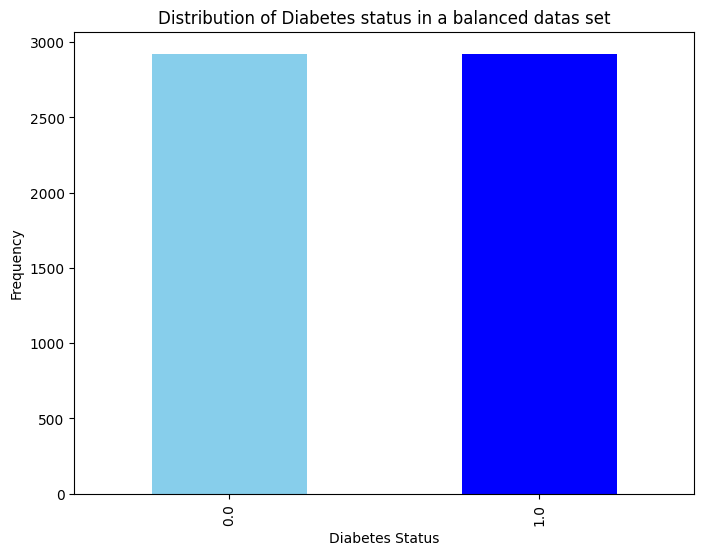

In [38]:
balanced_count = y_train_rez.value_counts()
# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = balanced_count.plot(kind='bar', color=['skyblue', 'blue'])
plt.title('Distribution of Diabetes status in a balanced datas set')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency')
plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned DM Model Accuracy: 0.9722033898305085

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1247
         1.0       0.98      0.84      0.90       228

    accuracy                           0.97      1475
   macro avg       0.98      0.92      0.94      1475
weighted avg       0.97      0.97      0.97      1475



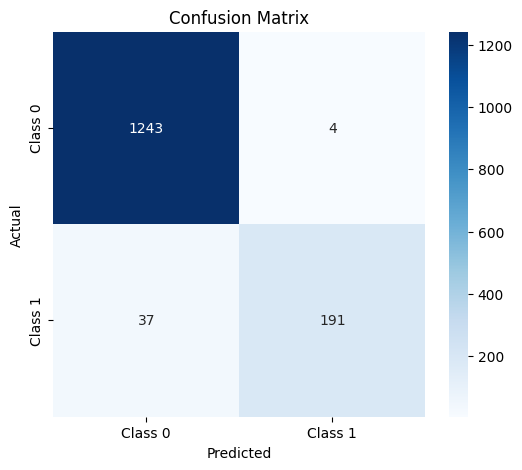

In [39]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to data
grid_search.fit(x_train_rez, y_train_rez)

# Get the best parameters and model
print("Best Parameters: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate best model
predictions_dm = best_rf_model.predict(X_test)
accuracy_dm = accuracy_score(y_test, predictions_dm)
print("Tuned DM Model Accuracy:", accuracy_dm)
print("\nClassification Report:")
print(classification_report(y_test, predictions_dm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_dm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, x_train_rez, y_train_rez, cv=5)

# Print average cross-validation score
print("Average Cross-Validation Score: ", cv_scores.mean())


Average Cross-Validation Score:  0.9803399793818957


In [41]:
import pickle

# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved using pickle.")

# Step 3: Load the model and scaler using pickle
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
def load_model_and_scaler():
    with open('random_forest_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    return model, scaler

# Make predictions using the loaded model
predictions_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, predictions_loaded)
print("Loaded Model Accuracy:", accuracy_loaded)


Model and scaler saved using pickle.
Loaded Model Accuracy: 0.9722033898305085


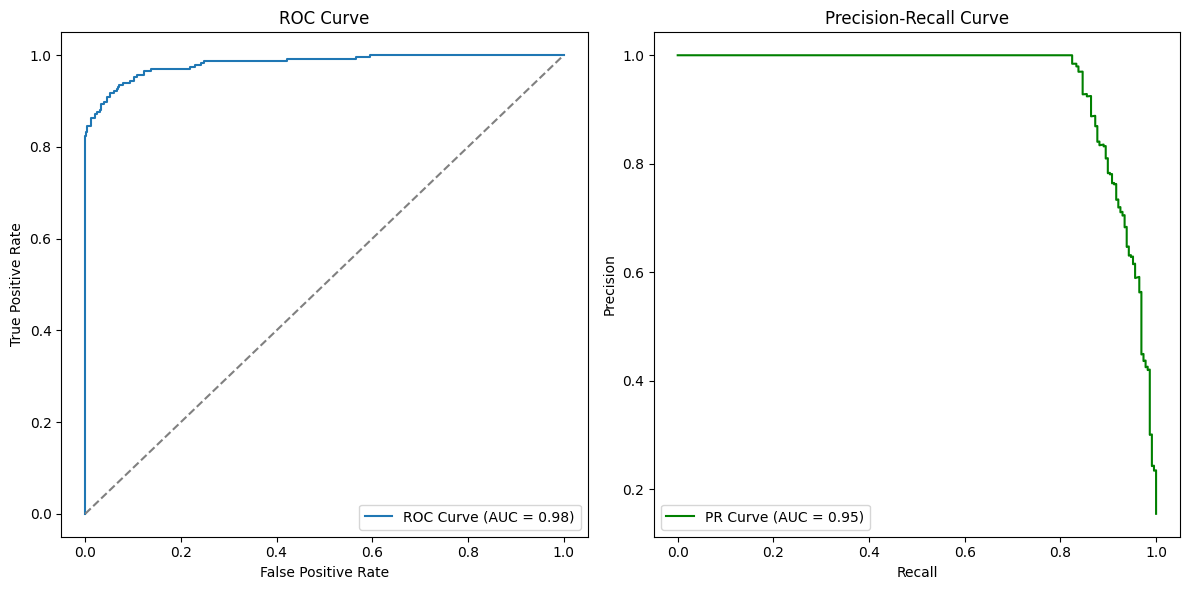

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is the true labels and y_proba is the predicted probabilities
y_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plotting the ROC Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plotting the Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
selected_features = [ 'age', 'weight_kg', 'height_cm', 'bmi', 'sys_bp', 'dia_bp',
       'glucose']
# Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model using the selected features
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model_selected = RandomForestClassifier( bootstrap=False, 
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=5, 
    n_estimators=300, class_weight='balanced'


)  

model_selected.fit(X_train_selected, y_train)

# Evaluate the retrained model
from sklearn.metrics import classification_report, accuracy_score

y_pred_selected = model_selected.predict(X_test_selected)
print("Accuracy of Retrained Model: ", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))


Accuracy of Retrained Model:  0.8820338983050847
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1247
         1.0       0.60      0.70      0.65       228

    accuracy                           0.88      1475
   macro avg       0.77      0.81      0.79      1475
weighted avg       0.89      0.88      0.89      1475



In [44]:
import joblib

# Save the trained model to a file
joblib.dump(model_selected, 'random_forest_model1.pkl')

print("Model saved to random_forest_model.pkl")


Model saved to random_forest_model.pkl


## Xgboost

In [45]:
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3],  # for imbalanced classes
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, enable_categorical=True)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Print best parameters and evaluate the model
print("Best Parameters: ", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate the performance on test data
y_pred = best_xgb_model.predict(X_test)
print("Accuracy of Retrained XGBoost Model: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy of Retrained XGBoost Model:  0.9694915254237289
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1247
         1.0       0.95      0.85      0.90       228

    accuracy                           0.97      1475
   macro avg       0.96      0.92      0.94      1475
weighted avg       0.97      0.97      0.97      1475



In [46]:
selected_features = [ 'age', 'weight_kg', 'height_cm', 'bmi', 'sys_bp', 'dia_bp',
       'glucose']
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    scale_pos_weight=1,
    enable_categorical=True,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=2,
    n_estimators=300,
    subsample=0.8
)

# Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model
xgb_model.fit(X_train_selected, y_train)

# Evaluate the retrained model
y_pred_selected = xgb_model.predict(X_test_selected)

# Print the accuracy and classification report
print("Accuracy of Retrained Model: ", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))

Accuracy of Retrained Model:  0.9023728813559322
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1247
         1.0       0.72      0.60      0.65       228

    accuracy                           0.90      1475
   macro avg       0.83      0.78      0.80      1475
weighted avg       0.90      0.90      0.90      1475



In [47]:
# from sklearn.svm import SVC

# # Initialize SVM model with class_weight='balanced' to handle imbalance
# svm_model = SVC(class_weight='balanced', random_state=42)

# # Fit the model
# svm_model.fit(x_train_rez, y_train_rez)

# # Make predictions
# predictions_svm = svm_model.predict(X_test)
# accuracy_svm = accuracy_score(y_test, predictions_svm)
# print("SVM Model Accuracy:", accuracy_svm)

# # Classification Report
# print(classification_report(y_test, predictions_svm))


In [48]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with different models
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='hard')

# Fit the voting classifier
voting_clf.fit(x_train_rez, y_train_rez)

# Make predictions
predictions_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, predictions_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

# Classification Report
print(classification_report(y_test, predictions_voting))


Voting Classifier Accuracy: 0.9715254237288136
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1247
         1.0       0.98      0.83      0.90       228

    accuracy                           0.97      1475
   macro avg       0.97      0.92      0.94      1475
weighted avg       0.97      0.97      0.97      1475



In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create base models (e.g., RandomForest, XGBoost, SVM)
base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced')),
    ('xgb', XGBClassifier(scale_pos_weight=1,enable_categorical=True)),
    # ('svm', SVC(class_weight='balanced', probability=True))
]

# Create a meta-model (Logistic Regression in this case)
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Fit the stacking model
stacking_clf.fit(x_train_rez, y_train_rez)

# Make predictions and evaluate
predictions_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, predictions_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking)


Stacking Classifier Accuracy: 0.9667796610169491


In [50]:
# from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Initialize NearMiss (you can choose NearMiss-1, NearMiss-2, NearMiss-3)
# nearmiss = NearMiss(sampling_strategy='auto', version=1)  # NearMiss-1 by default

# # Apply NearMiss to undersample the majority class
# X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

# # Check the class distribution after NearMiss
# print("Class distribution after NearMiss:", Counter(y_train_nearmiss))

# # Train your model with the resampled data
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_nearmiss, y_train_nearmiss)

# # Evaluate model performance on the test set
# y_pred = model.predict(X_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))


In [51]:
# from imblearn.under_sampling import TomekLinks
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from collections import Counter

# # Apply Tomek Links to remove majority class samples
# tomek = TomekLinks(sampling_strategy='auto')
# X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# # Check the class distribution after Tomek Links
# print("Class distribution after Tomek Links:", Counter(y_train_tomek))

# # Train a RandomForest model on the Tomek Links resampled data
# rf_model_tomek = RandomForestClassifier(random_state=42)
# rf_model_tomek.fit(X_train_tomek, y_train_tomek)

# # Make predictions on the test set
# predictions_tomek = rf_model_tomek.predict(X_test)

# # Evaluate the model
# accuracy_tomek = accuracy_score(y_test, predictions_tomek)
# print("Accuracy after Tomek Links:", accuracy_tomek)

# # Classification Report
# print("Classification Report after Tomek Links:")
# print(classification_report(y_test, predictions_tomek))


In [52]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# Split the data into training and validation sets
X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape and labels
print("X_train_dl shape:", X_train_dl.shape)
print("y_train_dl shape:", y_train_dl.shape)
print("Unique classes in y_train_dl:", np.unique(y_train_dl))

# Ensure the data is in numpy array format
X_train_dl = np.array(X_train_dl)
X_val_dl = np.array(X_val_dl)
y_train_dl = np.array(y_train_dl)
y_val_dl = np.array(y_val_dl)

# Check data types and ensure they are numeric
print("Data type of X_train_dl:", X_train_dl.dtype)
print("Data type of y_train_dl:", y_train_dl.dtype)

# Create the deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_dl.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=30, batch_size=64, validation_data=(X_val_dl, y_val_dl), class_weight={0: 1, 1: 3})

# Evaluate the model on test data
X_test_scaled = scaler.transform(X_test)
predictions_dl = model.predict(X_test_scaled)
predictions_dl = (predictions_dl > 0.5).astype(int)

# Print accuracy and classification report
accuracy_dl = accuracy_score(y_test, predictions_dl)
print("Deep Learning Model Accuracy:", accuracy_dl)
print("Classification Report:")
print(classification_report(y_test, predictions_dl))


X_train_dl shape: (4676, 56)
y_train_dl shape: (4676,)
Unique classes in y_train_dl: [0. 1.]
Data type of X_train_dl: float64
Data type of y_train_dl: float64
Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5576 - loss: 1.0220 - val_accuracy: 0.8487 - val_loss: 0.3707
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8561 - loss: 0.4849 - val_accuracy: 0.9043 - val_loss: 0.2431
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9248 - loss: 0.2976 - val_accuracy: 0.9325 - val_loss: 0.1722
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9412 - loss: 0.2079 - val_accuracy: 0.9453 - val_loss: 0.1366
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9622 - loss: 0.1542 - val_accuracy: 0.9504 - val_loss: 0.1213
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9730 - loss: 0.1222 - val_accuracy: 0.9521 - val_loss: 0.1134
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9734 - loss: 0.09

In [53]:
import streamlit as st
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Assuming StandardScaler was used

# Load the saved model and scaler for diabetes prediction
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')  # Load the scaler used during model training

# Streamlit app structure
st.title("Health Risk Prediction App")

# Diabetes Prediction Section
st.header("Diabetes Prediction with Selected Features")

# Input form for user data (Diabetes)
with st.form("user_input_form"):
    age = st.number_input("Age", min_value=0, step=1)
    weight_kg = st.number_input("Weight (kg)", min_value=0.0, step=0.1)
    height_cm = st.number_input("Height (cm)", min_value=0.0, step=0.1)
    bmi = st.number_input("BMI", min_value=0.0, step=0.1)
    sys_bp = st.number_input("Systolic Blood Pressure", min_value=0.0, step=0.1)
    dia_bp = st.number_input("Diastolic Blood Pressure", min_value=0.0, step=0.1)
    glucose = st.number_input("Glucose Level", min_value=0.0, step=0.1)
    
    # Submit button for diabetes prediction
    submitted = st.form_submit_button("Predict Diabetes Risk")

if submitted:
    # Prepare the input data for diabetes prediction
    input_data = pd.DataFrame({
        'age': [age],
        'weight_kg': [weight_kg],
        'height_cm': [height_cm],
        'bmi': [bmi],
        'sys_bp': [sys_bp],
        'dia_bp': [dia_bp],
        'glucose': [glucose]
    })

    # Apply the same scaling as was done during training
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction for diabetes
    prediction = model.predict(input_data_scaled)
    
    # Display the result for diabetes prediction
    if prediction[0] == 1:
        st.success("The model predicts a risk of diabetes.")
    else:
        st.success("The model predicts no risk of diabetes.")

# Depression Risk Assessment Section (PH9)
st.header("Depression Risk Assessment (PH9)")

# Section for PH9 questions
st.subheader("Please answer the following questions:")

# PH9 Questions
ph9_answers = {
    "Little interest or pleasure in doing things?": st.radio("1. Little interest or pleasure in doing things?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Feeling down, depressed, or hopeless?": st.radio("2. Feeling down, depressed, or hopeless?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Trouble falling or staying asleep, or sleeping too much?": st.radio("3. Trouble falling or staying asleep, or sleeping too much?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Feeling tired or having little energy?": st.radio("4. Feeling tired or having little energy?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Poor appetite or overeating?": st.radio("5. Poor appetite or overeating?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Feeling bad about yourself, or that you are a failure, or have let yourself or your family down?": st.radio("6. Feeling bad about yourself, or that you are a failure, or have let yourself or your family down?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Trouble concentrating on things, such as reading the newspaper or watching television?": st.radio("7. Trouble concentrating on things, such as reading the newspaper or watching television?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual?": st.radio("8. Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual?", ("Not at all", "Several days", "More than half the days", "Nearly every day")),
    "Thoughts that you would be better off dead, or of hurting yourself in some way?": st.radio("9. Thoughts that you would be better off dead, or of hurting yourself in some way?", ("Not at all", "Several days", "More than half the days", "Nearly every day"))
}

# Mapping responses to numeric values for scoring
score_map = {
    "Not at all": 0,
    "Several days": 1,
    "More than half the days": 2,
    "Nearly every day": 3
}

# Calculate the total score based on responses
if st.button("Assess Depression Risk"):
    ph9_score = sum([score_map[answer] for answer in ph9_answers.values()])
    
    # Depression Risk Classification based on PH9 score
    if ph9_score < 5:
        risk_level = "Low risk of depression."
    elif 5 <= ph9_score < 15:
        risk_level = "Moderate risk of depression."
    else:
        risk_level = "High risk of depression."
    
    # Display the result for depression risk assessment
    st.write(f"Total PH9 Score: {ph9_score}")
    st.write(risk_level)


2024-11-18 11:20:18.546 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 11:20:28.384 
  command:

    streamlit run C:\Users\ester\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-18 11:20:28.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 11:20:28.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 11:20:28.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 11:20:28.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 11:20:28.394 Thread 'MainThread': missing ScriptRunContext! This w